# Mod 1 Project 

## Importing Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
%matplotlib inline


In [2]:
df = pd.read_csv("kc_house_data.csv")

## Aims and Articles:

https://en.wikipedia.org/wiki/King_County,_Washington
https://www.seattletimes.com/business/real-estate/why-are-seattle-area-home-prices-so-high/

Aims to keep in mind:
We need pick at least 3 coefficients for your final model of house price.

Explain their impact on the price of a house in this dataset.

Model should not include any predictors with p-values greater than .05.

# EDA

## Basics

In [3]:
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   
5    101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6      6819     2.0         0.0   0.0  ...      7        1715              ?   
7      9711     1.0         0.0   NaN  ...      7        1060            0.0   
8      7470     1.0         0.0   0.0  ...      7        1050          730.0   
9      6560     2.0         0.0   0.0  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  
5     2001           0.0    98053  47.6561 -122.005           4760      101930  
6     1995           0.0    98003  47.3097 -122.327           2238        6819  
7     1963           0.0    98198  47.4095 -122.315           1650        9711  
8     1960           0.0    98146  47.5123 -122.337           1780        8113  
9     2003           0.0    98038  47.3684 -122.031           2390        7570  

[10 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

^ gives us a general overview to spot any problems with the data
There is no data that is negative when it should be positive

A house with 33 bedrooms! Worth checking out in case its an anomoly

describe() not showing date column (expected, as this may be a datetime object)

describe() not showing sqft_basement column, which is interesting and needs a look at



In [79]:
df.shape

(21592, 21)

Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - The year the house was most recently sold
* **pricePrice** -  is prediction target (so is this not sales price?)
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  square footage of the home
* **sqft_lotsquare** -  square footage of the lot (ie the size of the land the house is on)
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront 
* **view** - Has been viewed (given as a number of views, most viewed house has 4)
* **condition** - How good the condition is ( Overall ) (ranked from 1 to 5)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate (worth noting these are negative latitudes)
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 21 columns):
id               21592 non-null int64
date             21592 non-null object
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
floors           21592 non-null float64
waterfront       21592 non-null float64
view             21592 non-null float64
condition        21592 non-null int64
grade            21592 non-null int64
sqft_above       21592 non-null int64
sqft_basement    21592 non-null int64
yr_built         21592 non-null int64
yr_renovated     21592 non-null int64
zipcode          21592 non-null int64
lat              21592 non-null float64
long             21592 non-null float64
sqft_living15    21592 non-null int64
sqft_lot15       21592 non-null int64
dtypes: float64(7), int64(13), object(1)
memory usage: 3.6+ MB


In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Above tables show that sqft_basement is an object and we have null values in the waterfront, view, and yr_renovated columns.

In [82]:
duplicates = df.duplicated(subset=["id"], keep="first")
display(duplicates.value_counts())

duplicates = df.duplicated(subset=["id", "date"], keep="first")
display(duplicates.value_counts())

False    21415
True       177
dtype: int64

False    21592
dtype: int64

This suggests that we dont have duplicate entries

177 properties were resold

In [9]:
for x in list(df.columns):
    print(df[x].value_counts().head(10))

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
4/28/2015    121
4/22/2015    121
4/14/2015    121
7/9/2014     121
Name: date, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64
1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living

sqft_basement has ? as a placement holder value 

## Further exploration - Histograms and Scatter Plots 

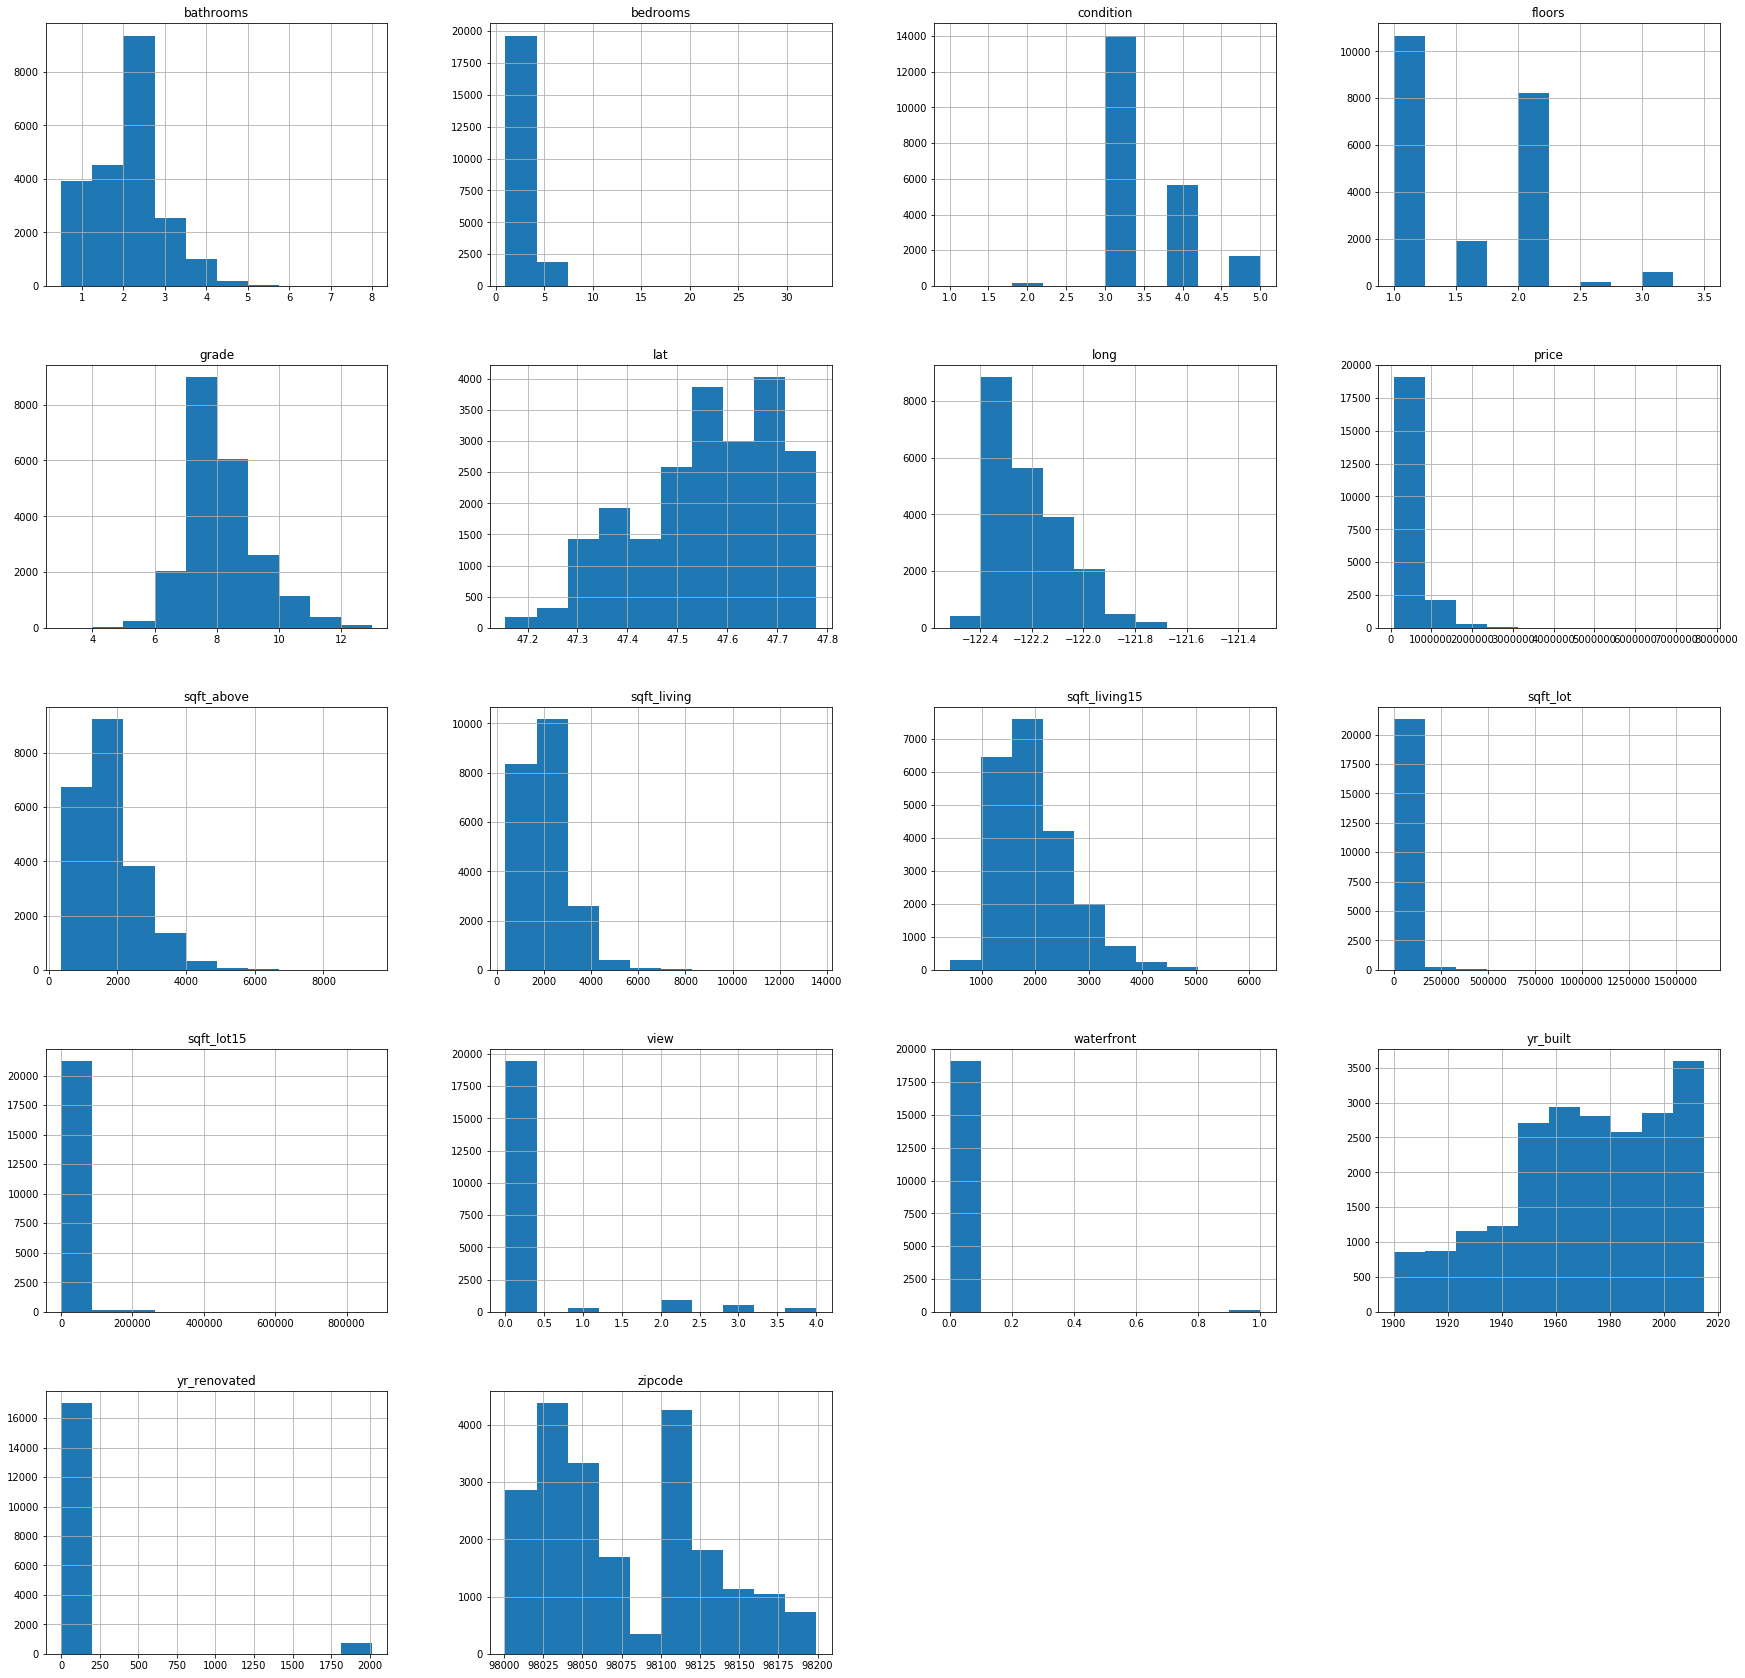

In [10]:
df_subset1 = df.drop(columns=["id", "date"], axis = 1)
df_subset1.hist(figsize  = [30, 30])
plt.show()

Helping us get to know the data better, nothing looks too out of the ordinary here

yr_renovated used 0 as a value for 'never renovated' which will make that data less useful unless adressed

Worth noting that some of these distrubutions look more normal than others, will be useful when deciding later which parameters to include in the model

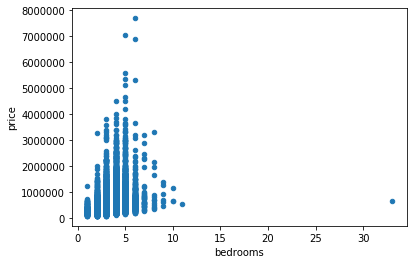

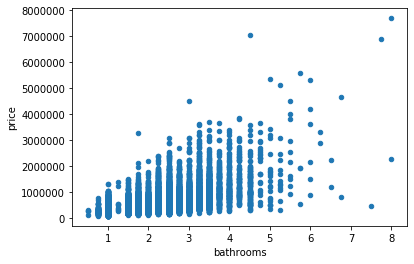

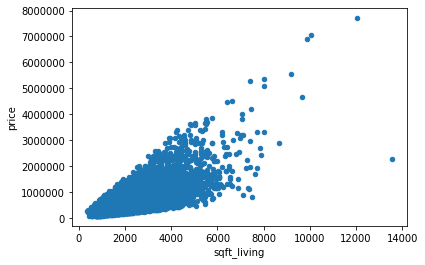

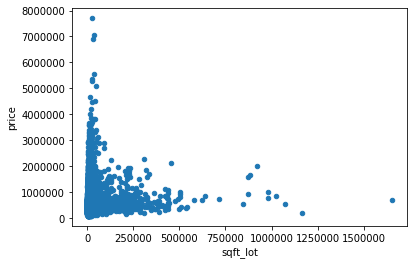

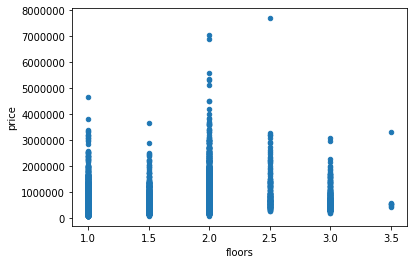

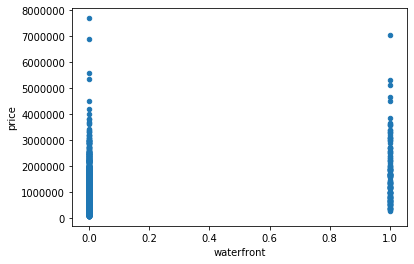

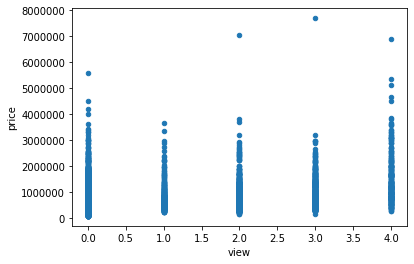

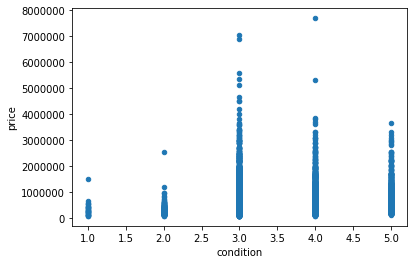

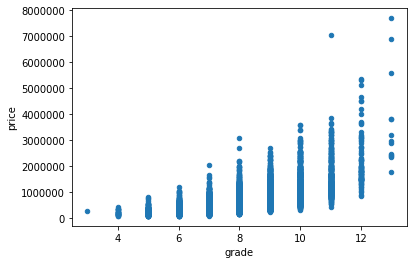

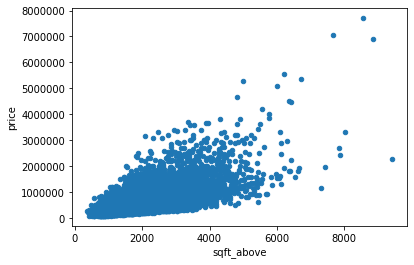

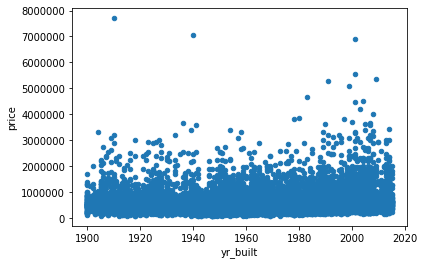

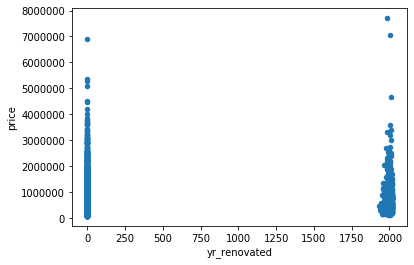

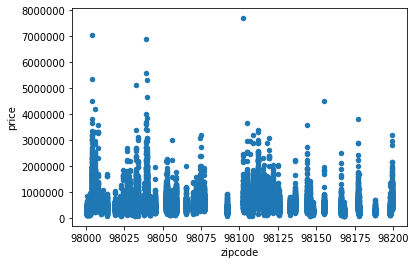

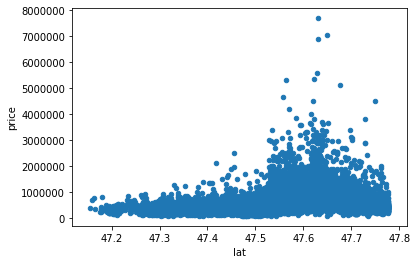

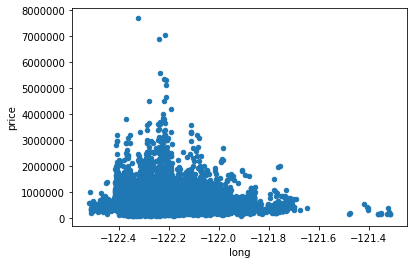

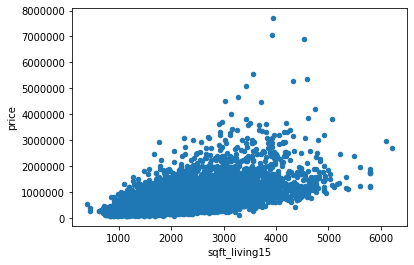

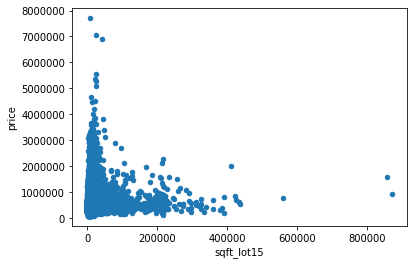

In [11]:
for x in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    df.plot.scatter(x,'price')
    
#sqft_basement not included as it still has placement value ?

Some of these are clearly categorical, worth noting as they will need addressing to include them in our model!

These outliers stood out to us:

In [12]:
#property with 33 bedrooms

df.loc[df["bedrooms"]==33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [13]:
#property with 9 bedrooms and 7.5 bathrooms

df.loc[(df["bedrooms"]==9)&(df['bathrooms']==7.5)]

id       date     price  bedrooms  bathrooms  sqft_living  \
8537  424049043  8/11/2014  450000.0         9        7.5         4050   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8537      6504     2.0         0.0   0.0  ...      7        4050   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8537            0.0     1996           0.0    98144  47.5923 -122.301   

      sqft_living15  sqft_lot15  
8537           1448        3866  

[1 rows x 21 columns]

In [14]:
#property with floor area of more than 13K sqft

df.loc[df["sqft_living"]>13000]

id      date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038  5/5/2014  2280000.0         7        8.0        13540   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
12764    307752     3.0         0.0   4.0  ...     12        9410   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12764         4130.0     1999           0.0    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15  
12764           4850      217800  

[1 rows x 21 columns]

In [15]:
#property with lot area of more than 1.6mil sqft

df.loc[df["sqft_lot"] > 1600000]

id       date     price  bedrooms  bathrooms  sqft_living  \
1717  1020069017  3/27/2015  700000.0         4        1.0         1300   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1717   1651359     1.0         0.0   3.0  ...      6        1300   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1717            0.0     1920           0.0    98022  47.2313 -122.023   

      sqft_living15  sqft_lot15  
1717           2560      425581  

[1 rows x 21 columns]

In [16]:
#nearest 15 neighbors' average lot area of more than 800K sqft

df.loc[df["sqft_lot15"] > 800000]

id       date      price  bedrooms  bathrooms  sqft_living  \
9705    225079036   1/7/2015   937500.0         4        4.0         5545   
20436  1125079111  4/15/2015  1600000.0         4        5.5         6530   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
9705     871200     2.0         0.0   0.0  ...     11        3605   
20436    871200     2.0         0.0   2.0  ...     11        6530   

       sqft_basement yr_built  yr_renovated  zipcode     lat     long  \
9705          1940.0     2003           0.0    98014  47.676 -121.882   
20436            0.0     2008           0.0    98014  47.664 -121.878   

       sqft_living15  sqft_lot15  
9705            3420      871200  
20436           1280      858132  

[2 rows x 21 columns]

## Total Findings

Columns:

1- 'waterfront' and 'view' columns have null values that need dealing with

2 - We need to work on the ?s in the basement situation and check that the two square foots add to total sqr foot

3 - 'yr_renovated' 0.0 needs addressing, reassign zeros to yr_built, and has null values


Outliers:
    
1 - 33 bedroom house for $600k 

2 - 9 bedroom 7.5 bathroom house, for $450k in central Seattle zipcode with mean $600k

3 - sqft_living =  13540 for $2.28mil in the outskirts

4 - sqft_lot = 1651359 for $700k

5 - Two sqft_lot_15 = ~800000 which are nearly twice as large as any others in 20,000 dataset



## Dealing with null colums

In [17]:
df_test = df.copy()
df_test['waterfront'].fillna(value=2, inplace=True) #use 2 as placeholder fo NaN
df_test.groupby('waterfront')['price'].describe()

count          mean           std       min       25%  \
waterfront                                                            
0.0         19075.0  5.326420e+05  3.449592e+05   78000.0  320000.0   
1.0           146.0  1.717215e+06  1.145385e+06  285000.0  827500.0   
2.0          2376.0  5.294301e+05  3.250794e+05   80000.0  322875.0   

                  50%        75%        max  
waterfront                                   
0.0          450000.0   638600.0  7700000.0  
1.0         1510000.0  2282500.0  7060000.0  
2.0          445000.0   649612.5  3200000.0

This shows us that the null values for the waterfront column closely align to the values for no waterfront view.

This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [18]:
df['waterfront'].fillna(value=0, inplace=True)
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Waterfront column cleaned!

In [19]:
df_test = df.copy()
df_test['view'].fillna(value=10, inplace=True) #use 10 as placeholder fo NaN
df_test.groupby('view')['price'].describe()

count          mean            std       min       25%        50%  \
view                                                                        
0.0   19422.0  4.968061e+05  287419.959567   78000.0  311525.0   432500.0   
1.0     330.0  8.133733e+05  512776.626107  217000.0  498250.0   691944.0   
2.0     957.0  7.913904e+05  510385.693444  169317.0  485000.0   675000.0   
3.0     508.0  9.732852e+05  613898.399842  154000.0  558000.0   802500.0   
4.0     317.0  1.452466e+06  930747.701932  252000.0  815000.0  1180000.0   
10.0     63.0  6.219582e+05  680927.087594  144000.0  322475.0   480000.0   

            75%        max  
view                        
0.0    600000.0  5570000.0  
1.0    923750.0  3650000.0  
2.0    938000.0  7060000.0  
3.0   1260000.0  7700000.0  
4.0   1850000.0  6890000.0  
10.0   679000.0  5300000.0

This shows us that the null values for the view column closely align to the values for zero views

This is our justification for reassigning the null value to zero, instead of to the mean or median 

In [20]:
df['view'].fillna(value=0, inplace=True)

View column cleaned!

yr_renovated column has many values that are 0.0, ie not renovated. There is no harm in reassigning these values to be equal to the year the house was built. We can apply the same assumption for the null values.

In [21]:
#placeholder yr_built for 0 and NaN
def proxy_yr_renovated(x):
    if ((x["yr_renovated"] == 0.0)| (np.isnan(x["yr_renovated"]))):
        return x["yr_built"]
    else:
        return x["yr_renovated"]

df["yr_renovated"] = df.apply(lambda x: proxy_yr_renovated(x), axis = 1)

df["yr_renovated"] = df["yr_renovated"].astype('int64')

df["yr_renovated"].tail()

21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_renovated, dtype: int64

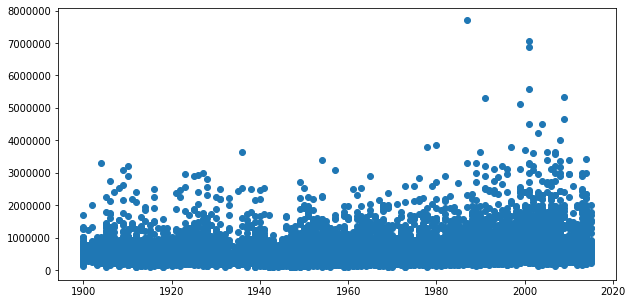

In [22]:
plt.figure(figsize = [10,5])
plt.scatter(df['yr_renovated'], df['price'])

Next, we will address the ? in the basement column. 
We will replicate column basement into a new column (basement2).
We will add a check_flr column to check if above + basement2 = living.
We will check to see if above + basement2 != living occur when there are ?'s or occur throughout the data.
We will reassign all the incorrect basement values to be living - above.

In [23]:
#copy basement (basement2): placeholder 0 for ?, change dtype to float
df["sqft_basement2"] = df.sqft_basement
df["sqft_basement2"].replace(to_replace = "?", value = 0, inplace = True) 
df["sqft_basement2"] = df["sqft_basement2"].astype(dtype = "float64") 
df.loc[df["sqft_basement"] == "?"].head()

id       date     price  bedrooms  bathrooms  sqft_living  \
6    1321400060  6/27/2014  257500.0         3       2.25         1715   
18     16000397  12/5/2014  189000.0         2       1.00         1200   
42   7203220400   7/7/2014  861990.0         5       2.75         3595   
79   1531000030  3/23/2015  720000.0         4       2.50         3450   
112  2525310310  9/16/2014  272500.0         3       1.75         1540   

     sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
6        6819     2.0         0.0   0.0  ...        1715              ?   
18       9850     1.0         0.0   0.0  ...        1200              ?   
42       5639     2.0         0.0   0.0  ...        3595              ?   
79      39683     2.0         0.0   0.0  ...        3450              ?   
112     12600     1.0         0.0   0.0  ...        1160              ?   

     yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
6        1995         1995    98003  47.3097 -122.327           2238   
18       1921         1921    98002  47.3089 -122.210           1060   
42       2014         2014    98053  47.6848 -122.016           3625   
79       2002         2002    98010  47.3420 -122.025           3350   
112      1980         1980    98038  47.3624 -122.031           1540   

     sqft_lot15  sqft_basement2  
6          6819             0.0  
18         5095             0.0  
42         5639             0.0  
79        39750             0.0  
112       11656             0.0  

[5 rows x 22 columns]

In [24]:
#added check_flr column to check if above + basement2 = living
df["check_flr"] = pd.Series(df["sqft_above"] + df["sqft_basement2"] == df["sqft_living"])
df.loc[df["check_flr"] == False]['sqft_basement'].value_counts()
#all false are those with 0 as placeholder. we can conclude that above+ basement = living

?    170
Name: sqft_basement, dtype: int64

In [25]:
#replace basement with living less above
df["sqft_basement"] =  df["sqft_living"] - df["sqft_above"]
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0         0.0   0.0  ...              0      1955   
1      7242     2.0         0.0   0.0  ...            400      1951   
2     10000     1.0         0.0   0.0  ...              0      1933   
3      5000     1.0         0.0   0.0  ...            910      1965   
4      8080     1.0         0.0   0.0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          1955    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2          1933    98028  47.7379 -122.233           2720        8062   
3          1965    98136  47.5208 -122.393           1360        5000   
4          1987    98074  47.6168 -122.045           1800        7503   

   sqft_basement2  check_flr  
0             0.0       True  
1           400.0       True  
2             0.0       True  
3           910.0       True  
4             0.0       True  

[5 rows x 23 columns]

In [26]:
#remove basement2 and check_flr
df.drop(columns = ["check_flr", "sqft_basement2"], inplace = True)
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180              0   
1      7242     2.0         0.0   0.0  ...      7        2170            400   
2     10000     1.0         0.0   0.0  ...      6         770              0   
3      5000     1.0         0.0   0.0  ...      7        1050            910   
4      8080     1.0         0.0   0.0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          1955    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933          1933    98028  47.7379 -122.233           2720   
3      1965          1965    98136  47.5208 -122.393           1360   
4      1987          1987    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

We have found all the houses where the sqft_above + sqft_basement doesn't equal sqft_living. It only happens when there are ? involved. In those cases, we have reassigned the ? to be the correct values, so that they satify the equation!

## Dealing with outliers

In [27]:
df.loc[df["bedrooms"]==33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0         0.0   0.0  ...      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856            580      1947          1947    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [28]:
df.loc[df["sqft_living"]==1620].sort_values(by = 'bedrooms', ascending = False)

id        date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014  640000.0        33       1.75         1620   
11089  9542840570    4/1/2015  305000.0         4       2.50         1620   
5323    254000545  10/23/2014  385000.0         4       2.50         1620   
5765   5248800250   4/27/2015  375000.0         4       2.00         1620   
9276   3856904610   10/2/2014  485000.0         4       1.00         1620   
9353   7715801030   3/31/2015  510000.0         4       2.50         1620   
9370   1624079057   7/17/2014  430000.0         4       1.00         1620   
9585   8651442510   9/26/2014  220000.0         4       2.00         1620   
20     6300500875   5/14/2014  385000.0         4       1.75         1620   
4394   3821000100   3/20/2015  249950.0         4       1.75         1620   
16505  4036801315   11/4/2014  425000.0         4       1.50         1620   
18328  1508210100   8/27/2014  442200.0         4       1.75         1620   
18635  1493300115   9/10/2014  415000.0         4       1.00         1620   
19044  1421039067  10/27/2014  218000.0         4       1.00         1620   
19201  3964400120    5/8/2015  512500.0         4       1.75         1620   
19262   822069066   2/23/2015  365000.0         4       2.50         1620   
4492    621069039   2/20/2015  327000.0         4       2.25         1620   
11457  2826049200   8/25/2014  451000.0         4       1.50         1620   
3406   1761300110    7/2/2014  260000.0         4       2.00         1620   
2214   7231501610  10/23/2014  327000.0         4       1.00         1620   
1532   4444800045   4/20/2015  657500.0         4       1.75         1620   
3465   4058801240  10/28/2014  330000.0         3       2.25         1620   
15939  7575600430  11/10/2014  240000.0         3       2.50         1620   
17863  2420069003   3/31/2015  299000.0         3       2.50         1620   
17613  1074100110   5/25/2014  355300.0         3       2.50         1620   
16992  5152200020    5/4/2015  298000.0         3       1.75         1620   
16744  2878600655   7/18/2014  665000.0         3       2.00         1620   
16036  8068000440  12/26/2014  399000.0         3       1.75         1620   
1592   8815400105    6/3/2014  500000.0         3       1.75         1620   
1437   1138010520    6/1/2014  459000.0         3       1.75         1620   
...           ...         ...       ...       ...        ...          ...   
8993   2125049131   7/29/2014  680000.0         3       1.75         1620   
12979  8562850150   5/23/2014  467100.0         3       1.75         1620   
3053   2652500015   6/10/2014  800000.0         3       2.25         1620   
9056   4083301380  10/17/2014  842000.0         3       1.00         1620   
11805  5438000060   11/3/2014  250000.0         3       2.25         1620   
1616   5418200295    3/9/2015  549500.0         3       1.75         1620   
12830  9826701345   7/15/2014  498000.0         3       2.50         1620   
12671  1828000230   7/14/2014  498000.0         3       2.00         1620   
12389  1545800710   5/23/2014  258000.0         3       1.75         1620   
9579    464001115   5/12/2014  620000.0         3       1.50         1620   
11518  3575301550    4/7/2015  560000.0         3       2.75         1620   
842    9429500045    5/9/2014  428750.0         3       1.00         1620   
21475  9268850040   3/27/2015  484000.0         3       2.25         1620   
10455   133000127   6/23/2014  265000.0         3       1.00         1620   
10401  3876311860  12/26/2014  525000.0         3       2.00         1620   
10681  2310010270   2/18/2015  280500.0         3       2.25         1620   
18828  4443800785  11/21/2014  481000.0         2       1.00         1620   
18249  6600220090  11/18/2014  475000.0         2       2.50         1620   
21167  5528600005   3/27/2015  272167.0         2       2.50         1620   
4304   7853340490   6/17/2014  386000.0         2       2.50         1620   
4353   3364

By looking at all the other similarly sized houses (by sqft) we can clearly see that the 33 bedroom house is a weird exception. We have a good arguement for just changing it to a 3 bedroom house. We also looked at the Latitude and Logitude and it was not a 3 bedroom house in that location, it was no bigger than any other houses near it. 

Enough evidence to change the bedroom to a 3 bedroom house!

In [29]:
df.iloc[15856, df.columns.get_loc('bedrooms')] = 3

df.iloc[15856]

id               2402100895
date              6/25/2014
price                640000
bedrooms                  3
bathrooms              1.75
sqft_living            1620
sqft_lot               6000
floors                    1
waterfront                0
view                      0
condition                 5
grade                     7
sqft_above             1040
sqft_basement           580
yr_built               1947
yr_renovated           1947
zipcode               98103
lat                 47.6878
long               -122.331
sqft_living15          1330
sqft_lot15             4700
Name: 15856, dtype: object

In [30]:
df.iloc[15856, df.columns.get_loc('bedrooms')]

3

9-bedroom and  7.5-bathroom house in Seattle city centre $450k, except mean is 600k and its by far the biggest house in the neighbourhood
Drop it!

In [31]:
df.loc[df["bathrooms"] > 7].sort_values(by = "price")
#index 8537 potential outlier

id        date      price  bedrooms  bathrooms  sqft_living  \
8537    424049043   8/11/2014   450000.0         9       7.50         4050   
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8537       6504     2.0         0.0   0.0  ...      7        4050   
12764    307752     3.0         0.0   4.0  ...     12        9410   
9245      31374     2.0         0.0   4.0  ...     13        8860   
7245      27600     2.5         0.0   3.0  ...     13        8570   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8537               0      1996          1996    98144  47.5923 -122.301   
12764           4130      1999          1999    98053  47.6675 -121.986   
9245            1030      2001          2001    98039  47.6305 -122.240   
7245            3480      1910          1987    98102  47.6298 -122.323   

       sqft_living15  sqft_lot15  
8537            1448        3866  
12764           4850      217800  
9245            4540       42730  
7245            3940        8800  

[4 rows x 21 columns]

In [32]:
df.drop(index = 8537, axis = 0, inplace = True)
df.loc[df["bathrooms"] > 7].sort_values(by = "price")

id        date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
12764    307752     3.0         0.0   4.0  ...     12        9410   
9245      31374     2.0         0.0   4.0  ...     13        8860   
7245      27600     2.5         0.0   3.0  ...     13        8570   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
12764           4130      1999          1999    98053  47.6675 -121.986   
9245            1030      2001          2001    98039  47.6305 -122.240   
7245            3480      1910          1987    98102  47.6298 -122.323   

       sqft_living15  sqft_lot15  
12764           4850      217800  
9245            4540       42730  
7245            3940        8800  

[3 rows x 21 columns]

We also drop a sqft_living = 13540 for $2.28mil in the outskirts and a sqft_lot = 1651359 for 700k, although they may be priced correctly
Logically, we weren't sure how there could be 2 values of sqft_lot15 that were so massive (800000>), so we removed them too
They are so weird that it is worth sacking them 

In [33]:
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

id      date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038  5/5/2014  2280000.0         7        8.0        13540   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
12764    307752     3.0         0.0   4.0  ...     12        9410   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
12764           4130      1999          1999    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15  
12764           4850      217800  

[1 rows x 21 columns]

In [34]:
df.loc[df['zipcode'] == 98053].sort_values(by = "sqft_living", ascending = False)

#index 12764 potential outlier.

id        date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   
6495   2626069030    2/9/2015  1940000.0         4       5.75         7220   
5054   1125069153   8/22/2014  1530000.0         4       3.50         5990   
10901  2954400310   9/15/2014  1770000.0         4       3.50         5440   
19548  1625069101    7/7/2014  1360000.0         4       3.00         5430   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6978    203100440   9/11/2014  1210000.0         3       3.75         5400   
14295  3528000040   3/26/2015  1800000.0         3       3.25         5290   
14294  3528000040   10/1/2014  1690000.0         3       3.25         5290   
2576   2954400520   4/30/2015  1240000.0         4       3.25         5180   
8436    125069038  11/25/2014  2140000.0         4       3.75         5150   
20120  3226069049   12/8/2014  1240000.0         4       4.50         5120   
5058   7237550020    7/3/2014  1100000.0         4       3.75         5070   
21504  7237550100   8/25/2014  1410000.0         4       4.00         4920   
16848   525069127   5/23/2014  1200000.0         4       3.50         4740   
1584   2954400400  11/12/2014  1150000.0         4       3.25         4740   
10803  2325069032   7/31/2014   875000.0         5       4.25         4720   
3268   2386000300   12/2/2014   800000.0         4       2.50         4600   
1060   7203220260   7/16/2014  1040000.0         5       3.25         4475   
6906   2386000020   10/8/2014   885000.0         4       2.25         4470   
1169   1117200390    5/7/2014  1150000.0         4       4.00         4460   
5826   2386000170   3/26/2015   970000.0         4       2.75         4430   
512    7322910030   7/21/2014  1100000.0         5       3.50         4410   
7451   7237550130   5/20/2014  1300000.0         4       3.50         4380   
11979  1330910370  10/20/2014   897500.0         4       3.00         4370   
12307  2386000070  10/29/2014   795127.0         4       3.25         4360   
2353   1425069116   11/7/2014  1190000.0         4       3.50         4340   
9393    425069020    5/5/2014  1090000.0         4       2.50         4340   
11915  3528000310   4/27/2015  1130000.0         5       2.50         4310   
3382   9290850740   6/18/2014   975000.0         4       2.50         4270   
...           ...         ...        ...       ...        ...          ...   
10929  8682262190   3/19/2015   480000.0         2       2.00         1350   
837    8682262400   5/13/2015   419950.0         2       1.75         1350   
8747   8682262170   5/30/2014   415000.0         2       1.75         1340   
14735  8682262380    9/5/2014   381000.0         2       2.00         1340   
4101   8682301910   7/22/2014   389000.0         2       2.00         1340   
13611  8682291970   9/24/2014   398000.0         2       2.00         1300   
13157  1428000970   5/21/2014   540000.0         3       1.75         1300   
17038   203900380   8/21/2014   326188.0         3       1.00         1300   
14041  8682260870   9/12/2014   344000.0         2       2.00         1300   
11566  8682280260   3/26/2015   412250.0         2       2.00         1300   
7869   8682281220  10/14/2014   439888.0         2       2.00         1300   
6231   7203102140   4/29/2015   300000.0         2       1.00         1290   
2009   7203102080  12/17/2014   305000.0         2       1.00         1290   
11516  7203101610   5/12/2014   265000.0         2       1.00         1290   
20490  7203101590    1/8/2015   305000.0         2       1.00         1290   
10268  8807600140   4/24/2015   405000.0         3       1.00         1280   
11575  8807810890   11/5/2014   385000.0         3       1.00         1250   
11574  8807810890   8/27/2014   259875.0         3       1.00         1250   
5294   8807810050   5/29/2014   405000.0         3       2.00         1240   
6919   7302000500   9/17/2014   34500

In [35]:
df.drop(index = 12764, axis = 0, inplace = True)
df.loc[df["sqft_living"] > 13000].sort_values(by = "price")

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [36]:
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

id       date     price  bedrooms  bathrooms  sqft_living  \
1717  1020069017  3/27/2015  700000.0         4        1.0         1300   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1717   1651359     1.0         0.0   3.0  ...      6        1300   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1717              0      1920          1920    98022  47.2313 -122.023   

      sqft_living15  sqft_lot15  
1717           2560      425581  

[1 rows x 21 columns]

In [37]:
df.loc[df['zipcode'] == 98022].sort_values(by = "sqft_lot", ascending = False)

#index 1717 potential outlier.

id        date     price  bedrooms  bathrooms  sqft_living  \
1717   1020069017   3/27/2015  700000.0         4       1.00         1300   
12993   619079096    4/6/2015  750000.0         3       2.50         2350   
17811  2220069003   2/23/2015  425000.0         3       2.75         1360   
12906   820079043   8/19/2014  428000.0         3       1.75         1580   
9201   3420069055   12/3/2014  350000.0         4       2.25         1570   
16981   720079001   6/26/2014  667000.0         3       1.75         3320   
18213   820079101  12/22/2014  525000.0         3       2.25         2040   
13451  3420069060   11/7/2014  790000.0         3       2.50         2640   
13617  1920079103   9/11/2014  390500.0         2       1.75         1460   
2869   1820069019   5/29/2014  302000.0         2       1.00          900   
19141  1020069042   10/1/2014  858000.0         4       3.50         4370   
13594   120069003   12/1/2014  495000.0         4       3.00         3620   
2958   1720069006   8/12/2014  474000.0         2       1.00         1050   
2755   3520069033   6/23/2014  230000.0         3       1.00         1530   
12179  1220069035  11/20/2014  438950.0         4       2.50         2470   
14016  1520069052   7/21/2014  327000.0         3       1.50         1510   
8698   2821079081  10/10/2014  590000.0         4       2.00         2490   
12261  3220079017   2/13/2015  432000.0         5       2.75         2060   
21335  3421069049  10/21/2014  565000.0         2       1.75         1130   
18371  3421069044  12/23/2014  390000.0         3       1.75         2092   
2409   3020079078  10/27/2014  487000.0         6       3.25         4750   
10907  3421069053   6/19/2014  600000.0         3       2.00         2540   
8910   1120069059   9/18/2014  475000.0         3       1.50         1790   
13313  2120069003  11/24/2014  220000.0         3       1.00         1000   
14335  3421069020  10/20/2014  314000.0         3       1.75         1350   
13208   820079081   9/11/2014  570000.0         4       3.00         2710   
14876  1720069075    5/8/2015  530000.0         3       3.00         2450   
4263   2621069066   4/27/2015  585000.0         3       2.00         3190   
5729   2921079027   9/24/2014  400000.0         4       2.50         2170   
12938   420069021  10/27/2014  246000.0         3       2.00         1990   
...           ...         ...       ...       ...        ...          ...   
8552   3701900085    8/5/2014  169000.0         3       1.50         1570   
18702  6018500015   7/11/2014  199990.0         2       1.00          890   
2601   5706500140   8/18/2014  205500.0         2       1.00          900   
9160   8661000033   6/27/2014  235000.0         3       1.75         1400   
14772  2420069604   3/30/2015  255000.0         3       2.50         1720   
962    1917300260   12/2/2014  210000.0         4       2.00         1520   
4042   2420069201   11/7/2014  267000.0         3       2.00         1390   
3389   1917300025   1/27/2015  122000.0         2       1.00          860   
7842   8005100360   9/16/2014  169900.0         3       1.00          910   
20862  2309710230   4/15/2015  275000.0         3       2.75         1740   
4550   5595900090    6/9/2014  250000.0         5       1.50         2520   
19652  8141300030   2/10/2015  340000.0         3       2.00         1920   
19659  2309710070   1/14/2015  280000.0         3       2.75         1740   
4545    853000261   6/19/2014  197500.0         3       1.00         1330   
13502  8005100571   12/5/2014  215000.0         2       1.00         1480   
21357  2309710150    8/4/2014  325000.0         4       3.25         2800   
14558  5595900210  11/19/2014  195000.0         2       1.00          800   
12133  5595900316   1/29/2015  231000.0         4       1.00         1220   
8521   8005100540    7/9/2014  215000.0         4       1.50         1860   
17805  2420069268   8/21/2014  184900.0         2       1.00         1230   
7778   6018

In [38]:
df.drop(index = 1717, axis = 0, inplace = True)
df.loc[df["sqft_lot"] > 1300000].sort_values(by = "price")

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [39]:
pd.DataFrame(df.sort_values(by = "sqft_lot15", ascending = False)[['price','sqft_lot15']]).head(10)

#potential outlier 9705, 20436

price  sqft_lot15
9705    937500.0      871200
20436  1600000.0      858132
13451   790000.0      560617
8655    549950.0      438213
3797    637000.0      434728
19141   858000.0      422967
6685   2000000.0      411962
21415   800000.0      392040
15606   180000.0      392040
17645   370000.0      386812

In [40]:
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

id       date      price  bedrooms  bathrooms  sqft_living  \
20436  1125079111  4/15/2015  1600000.0         4        5.5         6530   
9705    225079036   1/7/2015   937500.0         4        4.0         5545   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
20436    871200     2.0         0.0   2.0  ...     11        6530   
9705     871200     2.0         0.0   0.0  ...     11        3605   

       sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
20436              0      2008          2008    98014  47.664 -121.878   
9705            1940      2003          2003    98014  47.676 -121.882   

       sqft_living15  sqft_lot15  
20436           1280      858132  
9705            3420      871200  

[2 rows x 21 columns]

In [41]:
df.drop(index = [20436, 9705], axis = 0, inplace = True)
df.loc[df['sqft_lot15'] > 800000].sort_values(by = 'price', ascending = False)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

Now we have clean enough data! 

## Some interesting questions

Apart from building a model to predict a house's price, we want to address a few things more in detail.

1 - How crazy was the housing market in Seattle in 2014/2015?

Houses that were sold and resold in this period increased in price how much?

2 - "What year's houses were built the best?"

We would expect that in general, as houses get old, their condition would worsen. Is there a year/decade that bucks this trend, because theyre houses were built to withstand deterioration better?


3 - "Is it worth adding another bathroom, assuming it costs $25,000 to do so?"

If all else is held steady in our model, will adding a bathroom increase price by 25k?
Do houses in our data show an average increase of 25k if they have one more bathroom?

We will answer these questions later once we have an accurate model to help us!

# Gameplan for Model

In [42]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016287  0.003107   0.006399    -0.010990 -0.134623   
price         -0.016287  1.000000  0.315649   0.525663     0.702146  0.089031   
bedrooms       0.003107  0.315649  1.000000   0.526594     0.593504  0.031650   
bathrooms      0.006399  0.525663  0.526594   1.000000     0.755004  0.087430   
sqft_living   -0.010990  0.702146  0.593504   0.755004     1.000000  0.173658   
sqft_lot      -0.134623  0.089031  0.031650   0.087430     0.173658  1.000000   
floors         0.018895  0.256306  0.183187   0.502635     0.353561 -0.006206   
waterfront    -0.003625  0.264538 -0.002008   0.063906     0.105208  0.023156   
view           0.012347  0.392729  0.079922   0.184938     0.280145  0.069023   
condition     -0.023913  0.036314  0.023733  -0.126193    -0.059006 -0.009651   
grade          0.008636  0.667634  0.366267   0.666292     0.763594  0.117648   
sqft_above    -0.009712  0.604792  0.491939   0.685272     0.875836  0.186124   
sqft_basement -0.004593  0.322721  0.308794   0.281719     0.432552  0.011546   
yr_built       0.021781  0.053615  0.160543   0.507740     0.318500  0.056928   
yr_renovated   0.020167  0.097265  0.169645   0.533084     0.339646  0.056084   
zipcode       -0.008366 -0.053092 -0.158982  -0.205383    -0.200169 -0.133064   
lat           -0.001777  0.306713 -0.011815   0.023600     0.051523 -0.088142   
long           0.021106  0.021233  0.136484   0.224653     0.240644  0.236668   
sqft_living15 -0.002392  0.585096  0.404683   0.570794     0.757884  0.149728   
sqft_lot15    -0.140899  0.079455  0.029713   0.081447     0.178441  0.705022   

                 floors  waterfront      view  condition     grade  \
id             0.018895   -0.003625  0.012347  -0.023913  0.008636   
price          0.256306    0.264538  0.392729   0.036314  0.667634   
bedrooms       0.183187   -0.002008  0.079922   0.023733  0.366267   
bathrooms      0.502635    0.063906  0.184938  -0.126193  0.666292   
sqft_living    0.353561    0.105208  0.280145  -0.059006  0.763594   
sqft_lot      -0.006206    0.023156  0.069023  -0.009651  0.117648   
floors         1.000000    0.020820  0.027892  -0.263957  0.458495   
waterfront     0.020820    1.000000  0.380961   0.016642  0.082909   
view           0.027892    0.380961  1.000000   0.045711  0.248635   
condition     -0.263957    0.016642  0.045711   1.000000 -0.146696   
grade          0.458495    0.082909  0.248635  -0.146696  1.000000   
sqft_above     0.524030    0.072069  0.164130  -0.158788  0.756329   
sqft_basement -0.247550    0.083014  0.272933   0.174575  0.166743   
yr_built       0.489069   -0.024482 -0.054549  -0.361480  0.447712   
yr_renovated   0.500611   -0.006884 -0.026665  -0.390160  0.459204   
zipcode       -0.059498    0.028917  0.085566   0.002885 -0.185575   
lat            0.048980   -0.012158  0.006484  -0.014930  0.113188   
long           0.125692   -0.037615 -0.078637  -0.105812  0.199734   
sqft_living15  0.279815    0.083891  0.278396  -0.093035  0.713979   
sqft_lot15    -0.014526    0.032724  0.069731  -0.001827  0.118841   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.009712      -0.004593  0.021781      0.020167 -0.008366   
price            0.604792       0.322721  0.053615      0.097265 -0.053092   
bedrooms         0.491939       0.308794  0.160543      0.169645 -0.158982   
bathrooms        0.685272       0.281719  0.507740      0.533084 -0.205383   
sqft_living      0.875836       0.432552  0.318500      0.339646 -0.200169   
sqft_lot         0.186124       0.011546  0.056928      0.056084 -0.133064   
floors           0.524030      -0.247550  0.489069      0.500611 -0.059498   
waterfront       0.072069       0.083014 -0.024482     -0.006884  0.028917   
view             0.164130       0.272933 -0.054549     -0.026665  0.085566   
condition       -0.158788       0.174575 -0.361480     -0.390160  0.

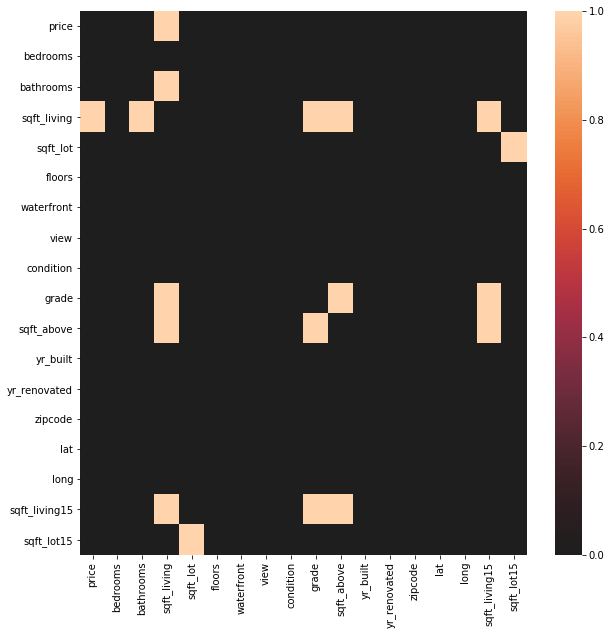

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap((((df_subset1.corr() >= 0.7) | (df_subset1.corr() <= -0.7)) & (df_subset1.corr() != 1)), center=0)

In [44]:
display(df.head())
display(df.columns)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180              0   
1      7242     2.0         0.0   0.0  ...      7        2170            400   
2     10000     1.0         0.0   0.0  ...      6         770              0   
3      5000     1.0         0.0   0.0  ...      7        1050            910   
4      8080     1.0         0.0   0.0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          1955    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933          1933    98028  47.7379 -122.233           2720   
3      1965          1965    98136  47.5208 -122.393           1360   
4      1987          1987    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

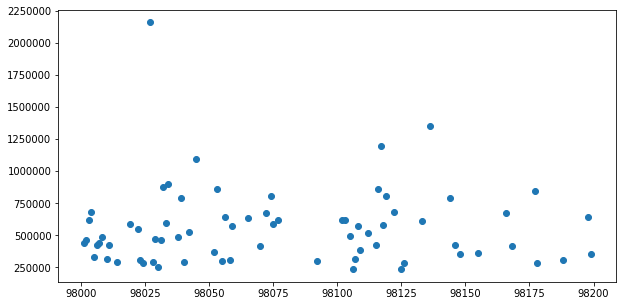

In [45]:
plt.figure(figsize = [10,5])
plt.scatter(df['zipcode'].astype("category").unique(), df.groupby('zipcode')['price'].mean())

In [46]:
df.groupby('zipcode')['price'].mean().sort_values(ascending = False).head(10)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
Name: price, dtype: float64

Given how different pricing v expensive houses in the city is vs pricing cheap houses in the suburbs is, we think it is smart to split our model up. Splitting by postcode, by waterfront and by price is similar, as the 4 postcodes around the waterfront are also the 4 most expensive. We will try find a split which allows us to price better, and this is the first we will try!

# Scaling and Normalisation

Work on how we are going to split our zip codes here...

In [47]:
#create a subset of predictors to be scaled or normalised
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

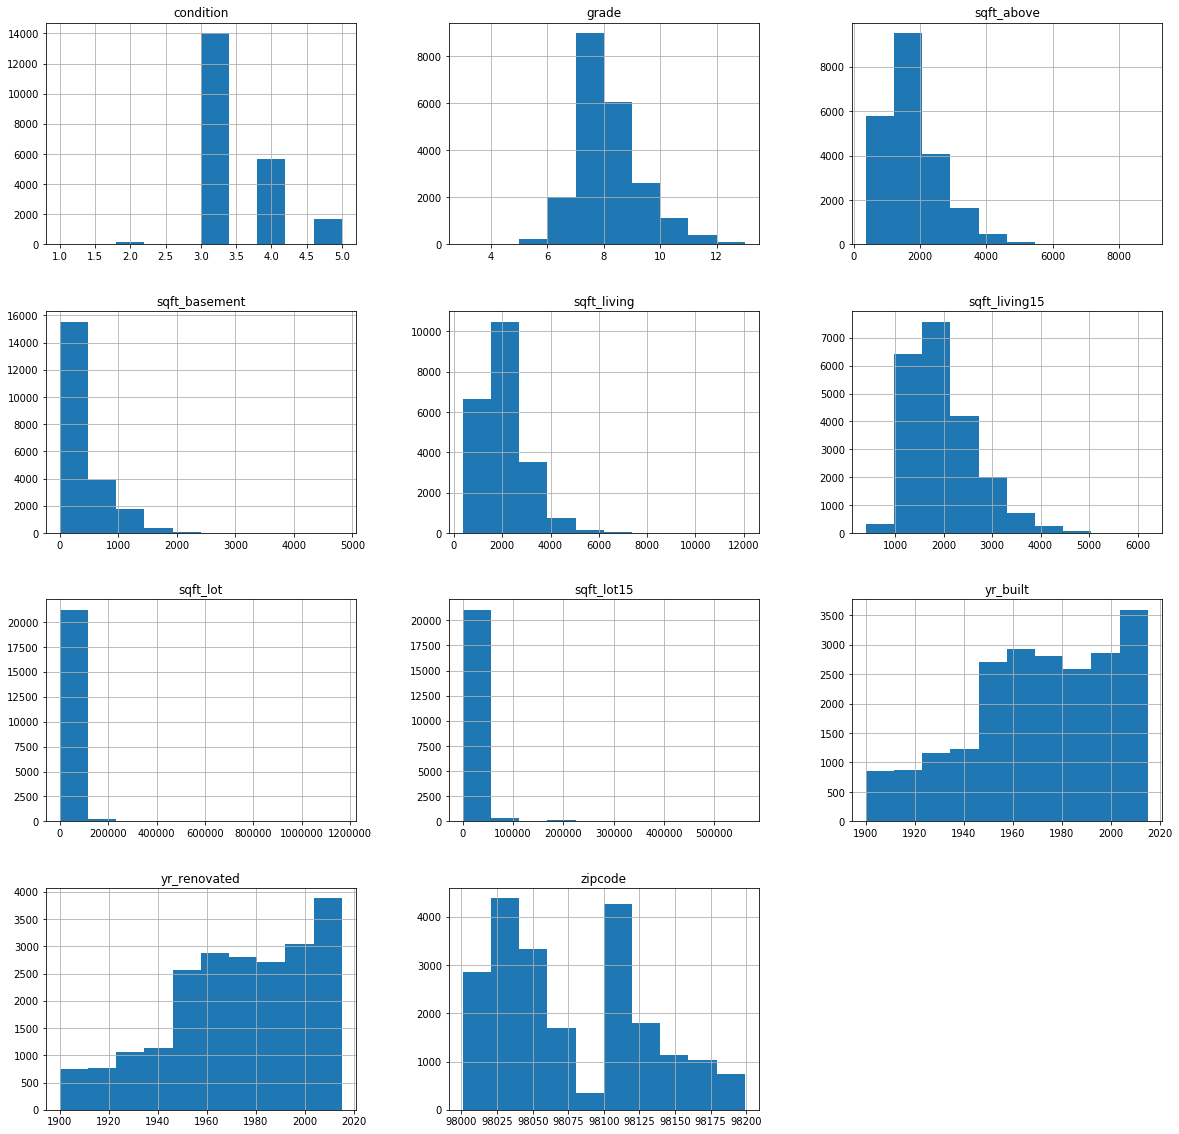

In [48]:
df_pred = df[['sqft_living','sqft_lot','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
df_pred.hist(figsize  = [20, 20])
plt.show()

In [49]:
df_pred.describe()

sqft_living      sqft_lot     condition         grade    sqft_above  \
count  21592.000000  2.159200e+04  21592.000000  21592.000000  21592.000000   
mean    2079.369489  1.493117e+04      3.409874      7.657512   1787.858049   
std      913.974780  3.898092e+04      0.650585      1.172459    825.355762   
min      370.000000  5.200000e+02      1.000000      3.000000    370.000000   
25%     1430.000000  5.040000e+03      3.000000      7.000000   1190.000000   
50%     1910.000000  7.617000e+03      3.000000      7.000000   1560.000000   
75%     2550.000000  1.067975e+04      4.000000      8.000000   2210.000000   
max    12050.000000  1.164794e+06      5.000000     13.000000   8860.000000   

       sqft_basement      yr_built  yr_renovated       zipcode  sqft_living15  \
count   21592.000000  21592.000000  21592.000000  21592.000000   21592.000000   
mean      291.511439   1970.996388   1972.942293  98077.958457    1986.452436   
std       441.791944     29.373587     28.943828     53.512216     684.925411   
min         0.000000   1900.000000   1900.000000  98001.000000     399.000000   
25%         0.000000   1951.000000   1954.000000  98033.000000    1490.000000   
50%         0.000000   1975.000000   1977.000000  98065.000000    1840.000000   
75%       560.000000   1997.000000   1999.000000  98118.000000    2360.000000   
max      4820.000000   2015.000000   2015.000000  98199.000000    6210.000000   

          sqft_lot15  
count   21592.000000  
mean    12651.170341  
std     25825.978176  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10080.000000  
max    560617.000000

In [50]:
#transform categorical predictor: yr_built, yr_renovated

In [51]:
display(df_pred["yr_built"].nunique(dropna = False))
display(df_pred["yr_built"].describe())

116

count    21592.000000
mean      1970.996388
std         29.373587
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [52]:
#yr_built_series = pd.Series(df_pred["yr_built"])
#cat_yr_built= yr_built_series.astype('category')

In [53]:
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()
#yr_built_encoded = (lb_make.fit_transform(cat_yr_built)) + 1 #(add 1 so yr_built_scaled is > 0)
#yr_built_encoded

In [54]:
#replace column zipcode with zipcode encounded

In [55]:
df_pred["yr_built_scaled"] = df_pred["yr_built"].map(lambda x: x - 1899)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_pred.head(10)

sqft_living  sqft_lot  condition  grade  sqft_above  sqft_basement  \
0         1180      5650          3      7        1180              0   
1         2570      7242          3      7        2170            400   
2          770     10000          3      6         770              0   
3         1960      5000          5      7        1050            910   
4         1680      8080          3      8        1680              0   
5         5420    101930          3     11        3890           1530   
6         1715      6819          3      7        1715              0   
7         1060      9711          3      7        1060              0   
8         1780      7470          3      7        1050            730   
9         1890      6560          3      7        1890              0   

   yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  yr_built_scaled  
0      1955          1955    98178           1340        5650               56  
1      1951          1991    98125           1690        7639               52  
2      1933          1933    98028           2720        8062               34  
3      1965          1965    98136           1360        5000               66  
4      1987          1987    98074           1800        7503               88  
5      2001          2001    98053           4760      101930              102  
6      1995          1995    98003           2238        6819               96  
7      1963          1963    98198           1650        9711               64  
8      1960          1960    98146           1780        8113               61  
9      2003          2003    98038           2390        7570              104

In [57]:
# display(df_pred["yr_renovated"].nunique(dropna = False))
# display(df_pred["yr_renovated"].describe())

In [58]:
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder()
# yr_renovated_encoded = (lb_make.fit_transform(cat_yr_built)) + 1#(add 1 so yr_renovated_scaled is > 0)
# yr_renovated_encoded

In [59]:
df_pred['yr_renovated_scaled'] = df_pred["yr_renovated"].map(lambda x: x - 1899)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
df_pred.tail(10)

sqft_living  sqft_lot  condition  grade  sqft_above  sqft_basement  \
21587         2270      5536          3      8        2270              0   
21588         1490      1126          3      8        1490              0   
21589         2520      6023          3      9        2520              0   
21590         3510      7200          3      9        2600            910   
21591         1310      1294          3      8        1180            130   
21592         1530      1131          3      8        1530              0   
21593         2310      5813          3      8        2310              0   
21594         1020      1350          3      7        1020              0   
21595         1600      2388          3      8        1600              0   
21596         1020      1076          3      7        1020              0   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
21587      2003          2003    98065           2270        5731   
21588      2014          2014    98144           1400        1230   
21589      2014          2014    98056           2520        6023   
21590      2009          2009    98136           2050        6200   
21591      2008          2008    98116           1330        1265   
21592      2009          2009    98103           1530        1509   
21593      2014          2014    98146           1830        7200   
21594      2009          2009    98144           1020        2007   
21595      2004          2004    98027           1410        1287   
21596      2008          2008    98144           1020        1357   

       yr_built_scaled  yr_renovated_scaled  
21587              104                  104  
21588              115                  115  
21589              115                  115  
21590              110                  110  
21591              109                  109  
21592              110                  110  
21593              115                  115  
21594              110                  110  
21595              105                  105  
21596              109                  109

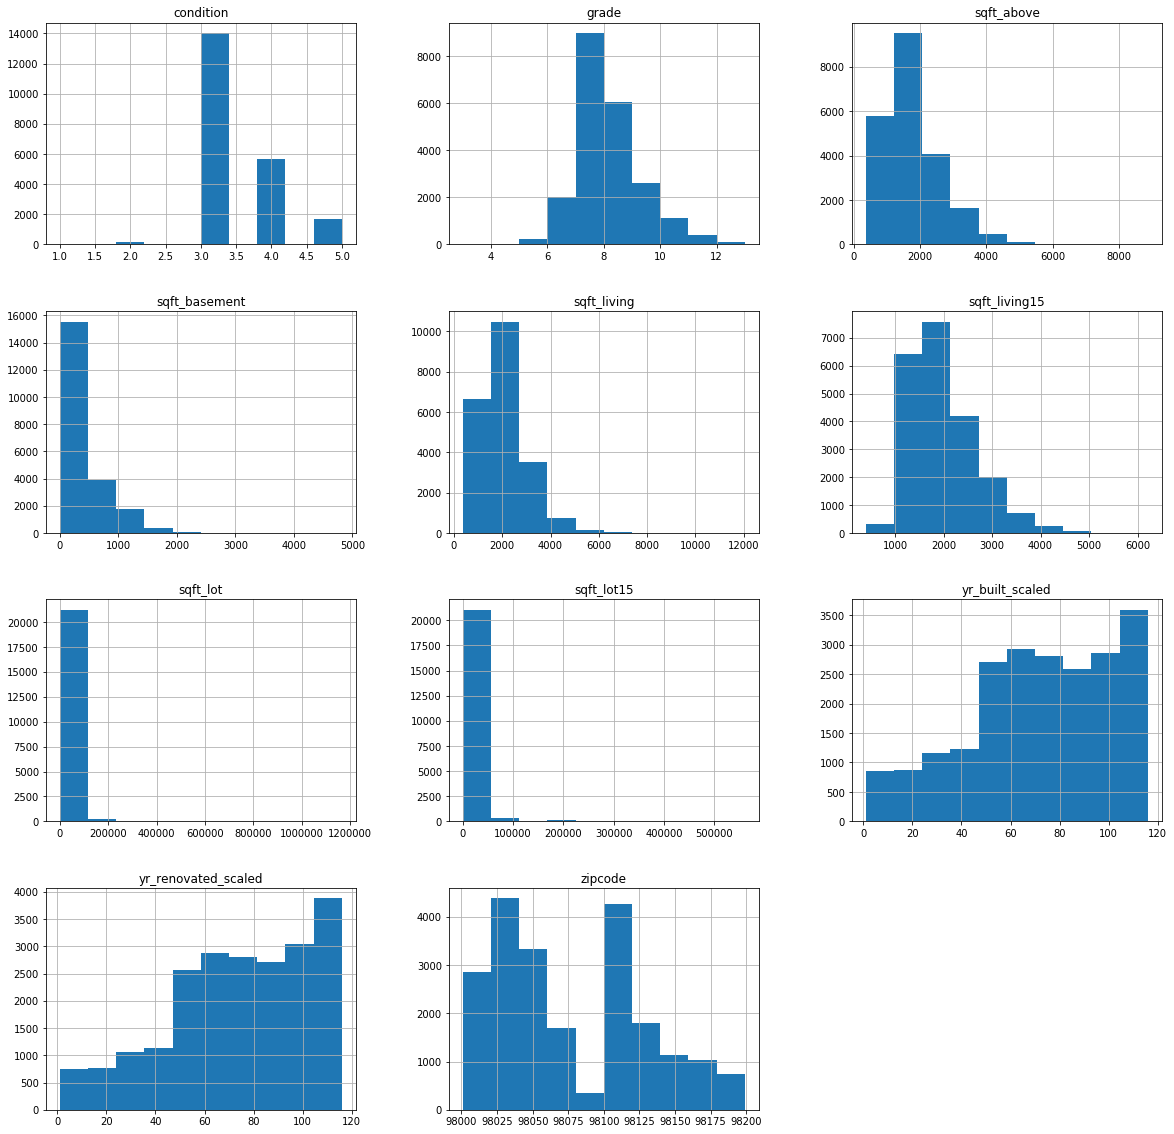

In [61]:
df_pred[['sqft_living','sqft_lot','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built_scaled', 'yr_renovated_scaled', 'zipcode','sqft_living15', 'sqft_lot15']].hist(figsize  = [20, 20])
plt.show()

In [62]:
for x in ['sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15']:
     df_pred[x+"_log"] = df_pred[x].map(lambda x: np.log(x))
df_pred.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sqft_living  sqft_lot  condition  grade  sqft_above  sqft_basement  \
0         1180      5650          3      7        1180              0   
1         2570      7242          3      7        2170            400   
2          770     10000          3      6         770              0   
3         1960      5000          5      7        1050            910   
4         1680      8080          3      8        1680              0   

   yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  \
0      1955          1955    98178           1340        5650   
1      1951          1991    98125           1690        7639   
2      1933          1933    98028           2720        8062   
3      1965          1965    98136           1360        5000   
4      1987          1987    98074           1800        7503   

   yr_built_scaled  yr_renovated_scaled  sqft_living_log  sqft_lot_log  \
0               56                   56         7.073270      8.639411   
1               52                   92         7.851661      8.887653   
2               34                   34         6.646391      9.210340   
3               66                   66         7.580700      8.517193   
4               88                   88         7.426549      8.997147   

   sqft_living15_log  sqft_lot15_log  
0           7.200425        8.639411  
1           7.432484        8.941022  
2           7.908387        8.994917  
3           7.215240        8.517193  
4           7.495542        8.923058

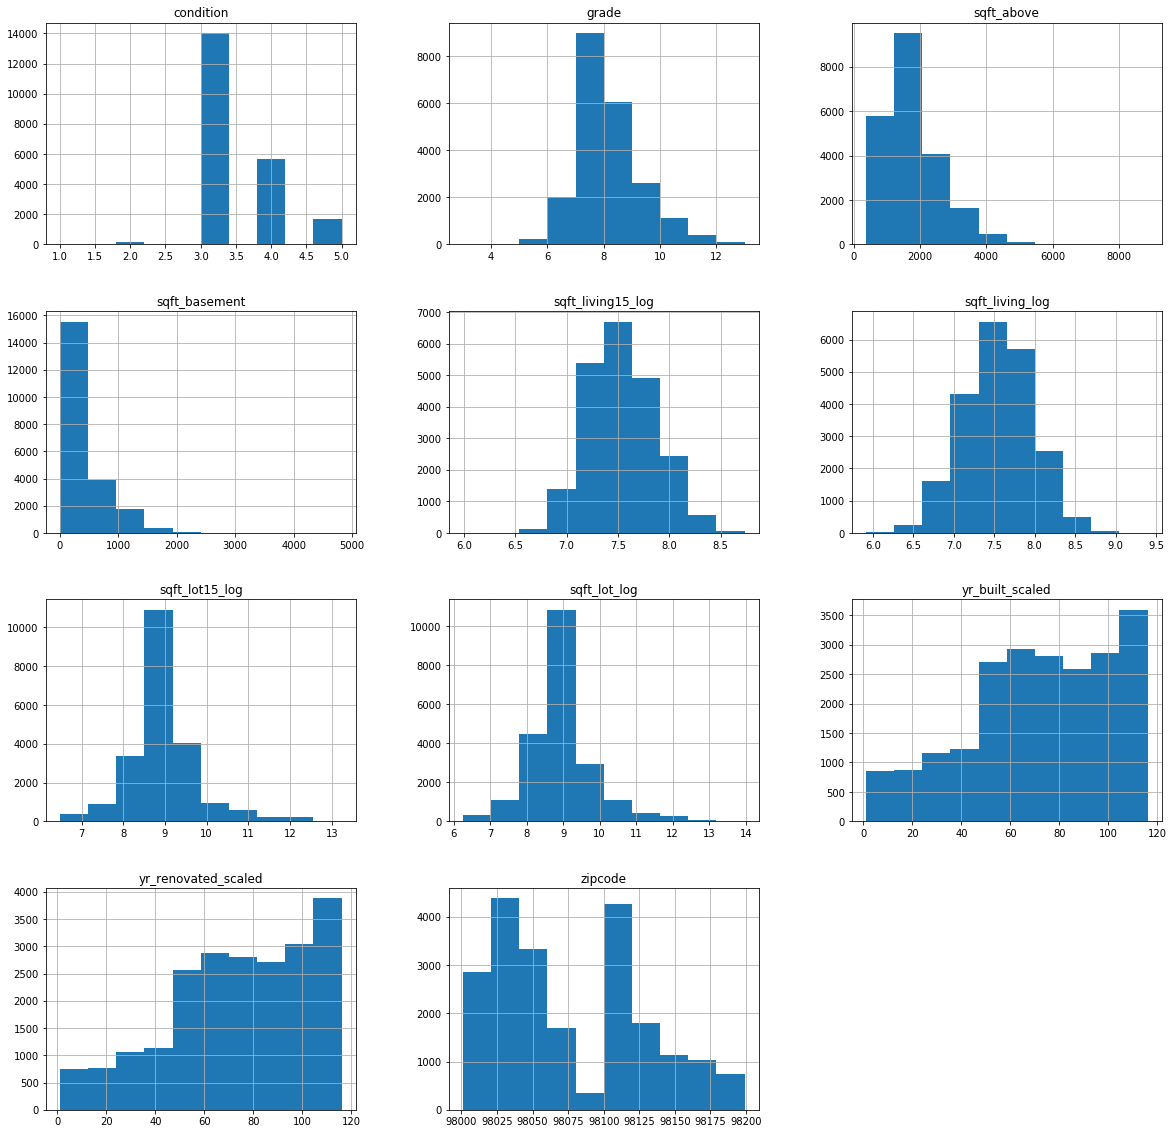

In [63]:
df_pred[['sqft_living_log','sqft_lot_log','condition', 'grade', 'sqft_above', 'sqft_basement',
              'yr_built_scaled', 'yr_renovated_scaled', 'zipcode','sqft_living15_log', 'sqft_lot15_log']].hist(figsize  = [20, 20])
plt.show()

In [64]:
display(df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mean()).head())
display(df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0]).head())

display(df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mean()).head())
display(df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mode()[0]).head())

zipcode
98001    7.296399
98002    6.693467
98003    7.542857
98004    8.687697
98005    8.488095
Name: grade, dtype: float64

zipcode
98001    7
98002    7
98003    7
98004    8
98005    8
Name: grade, dtype: int64

zipcode
98001    3.335180
98002    3.743719
98003    3.371429
98004    3.495268
98005    3.696429
Name: condition, dtype: float64

zipcode
98001    3
98002    4
98003    3
98004    3
98005    4
Name: condition, dtype: int64

In [65]:
#add mean and mode grade per zipcode

mode_grade = df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0])
mean_grade = df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mean())

#add mean and mode condition per zipcode

mean_condition = df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mean())
mode_condition = df_pred.groupby(df_pred['zipcode']).condition.apply(lambda x: x.mode()[0])


df_zipcode = pd.DataFrame({'zipcode': df_pred.groupby(df_pred['zipcode']).grade.apply(lambda x: x.mode()[0]).index,
                           'mean_grade_per_zipcode': mean_grade,
                           'mode_grade_per_zipcode': mode_grade,
                           'mean_condition_per_zipcode': mean_condition,
                           'mode_condition_per_zipcode': mode_condition,})
df_zipcode.drop(columns = "zipcode", axis = 1, inplace = True)
df_zipcode

mean_grade_per_zipcode  mode_grade_per_zipcode  \
zipcode                                                   
98001                  7.296399                       7   
98002                  6.693467                       7   
98003                  7.542857                       7   
98004                  8.687697                       8   
98005                  8.488095                       8   
98006                  8.795181                       8   
98007                  7.964539                       7   
98008                  7.653710                       7   
98010                  7.400000                       7   
98011                  7.774359                       7   
98014                  7.327869                       7   
98019                  7.510526                       7   
98022                  7.181034                       7   
98023                  7.575150                       7   
98024                  7.612500                       7   
98027                  8.189320                       8   
98028                  7.611307                       7   
98029                  8.395639                       8   
98030                  7.414062                       7   
98031                  7.377289                       7   
98032                  7.144000                       7   
98033                  8.076389                       7   
98034                  7.506422                       7   
98038                  7.597623                       7   
98039                  9.560000                       9   
98040                  8.960993                       8   
98042                  7.424132                       7   
98045                  7.636364                       7   
98052                  8.191638                       8   
98053                  8.271144                       8   
...                         ...                     ...   
98092                  7.851852                       8   
98102                  8.298077                       8   
98103                  7.410299                       7   
98105                  7.838428                       7   
98106                  6.865672                       7   
98107                  7.424812                       7   
98108                  7.016129                       7   
98109                  8.018349                       8   
98112                  8.442379                       8   
98115                  7.361921                       7   
98116                  7.569697                       7   
98117                  7.282098                       7   
98118                  6.976331                       7   
98119                  8.021739                       8   
98122                  7.744828                       8   
98125                  7.176039                       7   
98126                  7.031073                       7   
98133                  7.123732                       7   
98136                  7.403042                       7   
98144                  7.456140                       7   
98146                  6.822917                       7   
98148                  6.947368                       7   
98155                  7.170404                       7   
98166                  7.393701                       7   
98168                  6.509294                       7   
98177                  7.976471                       8   
98178                  6.816794                       7   
98188                  7.036765                       7   
98198                  7.103571                       7   
98199                  8.012618                       7   

         mean_condition_per_zipcode  mode_condition_per_zipcode  
zipcode                                                          
98001                      3.335180                           3  
98002                      3.743719                           4  
98003                      

In [66]:
df_pred.drop(columns = ['sqft_living', 'sqft_lot', 'condition','grade', 'sqft_above',
                         'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
                         'sqft_lot15'], inplace = True)

df_pred.head()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


yr_built_scaled  yr_renovated_scaled  sqft_living_log  sqft_lot_log  \
0               56                   56         7.073270      8.639411   
1               52                   92         7.851661      8.887653   
2               34                   34         6.646391      9.210340   
3               66                   66         7.580700      8.517193   
4               88                   88         7.426549      8.997147   

   sqft_living15_log  sqft_lot15_log  
0           7.200425        8.639411  
1           7.432484        8.941022  
2           7.908387        8.994917  
3           7.215240        8.517193  
4           7.495542        8.923058

In [67]:
df_final = pd.concat([df, df_pred], axis =1, join = 'outer') # add scaled / normalised predictors

In [68]:
df_final.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...      lat     long  sqft_living15  \
0      5650     1.0         0.0   0.0  ...  47.5112 -122.257           1340   
1      7242     2.0         0.0   0.0  ...  47.7210 -122.319           1690   
2     10000     1.0         0.0   0.0  ...  47.7379 -122.233           2720   
3      5000     1.0         0.0   0.0  ...  47.5208 -122.393           1360   
4      8080     1.0         0.0   0.0  ...  47.6168 -122.045           1800   

   sqft_lot15  yr_built_scaled  yr_renovated_scaled  sqft_living_log  \
0        5650               56                   56         7.073270   
1        7639               52                   92         7.851661   
2        8062               34                   34         6.646391   
3        5000               66                   66         7.580700   
4        7503               88                   88         7.426549   

   sqft_lot_log  sqft_living15_log  sqft_lot15_log  
0      8.639411           7.200425        8.639411  
1      8.887653           7.432484        8.941022  
2      9.210340           7.908387        8.994917  
3      8.517193           7.215240        8.517193  
4      8.997147           7.495542        8.923058  

[5 rows x 27 columns]

In [69]:
df_final = df_final.join(df_zipcode, on = "zipcode", how = "left") # add df_zipcode

In [70]:
df_final.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built_scaled  \
0      5650     1.0         0.0   0.0  ...               56   
1      7242     2.0         0.0   0.0  ...               52   
2     10000     1.0         0.0   0.0  ...               34   
3      5000     1.0         0.0   0.0  ...               66   
4      8080     1.0         0.0   0.0  ...               88   

   yr_renovated_scaled  sqft_living_log  sqft_lot_log  sqft_living15_log  \
0                   56         7.073270      8.639411           7.200425   
1                   92         7.851661      8.887653           7.432484   
2                   34         6.646391      9.210340           7.908387   
3                   66         7.580700      8.517193           7.215240   
4                   88         7.426549      8.997147           7.495542   

   sqft_lot15_log  mean_grade_per_zipcode  mode_grade_per_zipcode  \
0        8.639411                6.816794                       7   
1        8.941022                7.176039                       7   
2        8.994917                7.611307                       7   
3        8.517193                7.403042                       7   
4        8.923058                8.709751                       9   

   mean_condition_per_zipcode  mode_condition_per_zipcode  
0                    3.320611                           3  
1                    3.342298                           3  
2                    3.300353                           3  
3                    3.395437                           3  
4                    3.126984                           3  

[5 rows x 31 columns]

In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 31 columns):
id                            21592 non-null int64
date                          21592 non-null object
price                         21592 non-null float64
bedrooms                      21592 non-null int64
bathrooms                     21592 non-null float64
sqft_living                   21592 non-null int64
sqft_lot                      21592 non-null int64
floors                        21592 non-null float64
waterfront                    21592 non-null float64
view                          21592 non-null float64
condition                     21592 non-null int64
grade                         21592 non-null int64
sqft_above                    21592 non-null int64
sqft_basement                 21592 non-null int64
yr_built                      21592 non-null int64
yr_renovated                  21592 non-null int64
zipcode                       21592 non-null int64
lat          

In [72]:
df_final.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built_scaled  \
0      5650     1.0         0.0   0.0  ...               56   
1      7242     2.0         0.0   0.0  ...               52   
2     10000     1.0         0.0   0.0  ...               34   
3      5000     1.0         0.0   0.0  ...               66   
4      8080     1.0         0.0   0.0  ...               88   

   yr_renovated_scaled  sqft_living_log  sqft_lot_log  sqft_living15_log  \
0                   56         7.073270      8.639411           7.200425   
1                   92         7.851661      8.887653           7.432484   
2                   34         6.646391      9.210340           7.908387   
3                   66         7.580700      8.517193           7.215240   
4                   88         7.426549      8.997147           7.495542   

   sqft_lot15_log  mean_grade_per_zipcode  mode_grade_per_zipcode  \
0        8.639411                6.816794                       7   
1        8.941022                7.176039                       7   
2        8.994917                7.611307                       7   
3        8.517193                7.403042                       7   
4        8.923058                8.709751                       9   

   mean_condition_per_zipcode  mode_condition_per_zipcode  
0                    3.320611                           3  
1                    3.342298                           3  
2                    3.300353                           3  
3                    3.395437                           3  
4                    3.126984                           3  

[5 rows x 31 columns]

# Models


In [73]:
#2 subsets

df_final1 = df_final.loc[(df_final["zipcode"] == 98039) 
                         | (df_final["zipcode"] == 98004)
                         | (df_final["zipcode"] == 98040)
                         | (df_final["zipcode"] == 98112)]

df_final1["zipcode"].unique()

array([98040, 98112, 98004, 98039])

In [74]:
df_final2 = df_final.loc[(df_final["zipcode"] != 98039) 
                         & (df_final["zipcode"] != 98004)
                         & (df_final["zipcode"] != 98040)
                         & (df_final["zipcode"] != 98112)]

df_final2["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98092, 98030, 98119, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122,
       98144, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032,
       98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006,
       98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072,
       98188, 98014, 98055])

In [75]:
df_final1.corr()

id     price  bedrooms  bathrooms  \
id                          1.000000 -0.054890 -0.087170  -0.087804   
price                      -0.054890  1.000000  0.398605   0.686522   
bedrooms                   -0.087170  0.398605  1.000000   0.537231   
bathrooms                  -0.087804  0.686522  0.537231   1.000000   
sqft_living                -0.097346  0.838925  0.579850   0.821732   
sqft_lot                   -0.109711  0.452354  0.296729   0.293306   
floors                     -0.046320  0.261691  0.166850   0.411007   
waterfront                  0.019247  0.343536  0.021655   0.121554   
view                       -0.011997  0.404802  0.163569   0.286733   
condition                  -0.055751 -0.053368  0.048939  -0.117361   
grade                      -0.098002  0.716579  0.426928   0.734042   
sqft_above                 -0.113409  0.796747  0.495451   0.745057   
sqft_basement              -0.002261  0.335350  0.328408   0.390321   
yr_built                    0.031681  0.255992  0.113021   0.445705   
yr_renovated                0.047160  0.296470  0.111763   0.470393   
zipcode                     0.071729 -0.151478 -0.159486  -0.088241   
lat                         0.123101  0.098870 -0.125877  -0.086172   
long                       -0.096316  0.113806  0.169011   0.113663   
sqft_living15              -0.178829  0.601696  0.383177   0.442541   
sqft_lot15                 -0.107676  0.478753  0.306641   0.289305   
yr_built_scaled             0.031681  0.255992  0.113021   0.445705   
yr_renovated_scaled         0.047160  0.296470  0.111763   0.470393   
sqft_living_log            -0.135601  0.751748  0.620090   0.812174   
sqft_lot_log               -0.179579  0.437005  0.384839   0.289279   
sqft_living15_log          -0.204542  0.569772  0.392873   0.429744   
sqft_lot15_log             -0.186264  0.425428  0.345839   0.264029   
mean_grade_per_zipcode     -0.099985  0.235154  0.182044   0.206425   
mode_grade_per_zipcode     -0.056578  0.290505  0.057667   0.154626   
mean_condition_per_zipcode -0.046199 -0.093369  0.126304   0.084111   
mode_condition_per_zipcode -0.053113 -0.072299  0.139073   0.095893   

                            sqft_living  sqft_lot    floors  waterfront  \
id                            -0.097346 -0.109711 -0.046320    0.019247   
price                          0.838925  0.452354  0.261691    0.343536   
bedrooms                       0.579850  0.296729  0.166850    0.021655   
bathrooms                      0.821732  0.293306  0.411007    0.121554   
sqft_living                    1.000000  0.460410  0.347081    0.198843   
sqft_lot                       0.460410  1.000000 -0.134042    0.116043   
floors                         0.347081 -0.134042  1.000000    0.035324   
waterfront                     0.198843  0.116043  0.035324    1.000000   
view                           0.356739  0.318685  0.006895    0.376534   
condition                     -0.057413  0.070692 -0.170587    0.043876   
grade                          0.794659  0.374400  0.496226    0.115641   
sqft_above                     0.874754  0.406635  0.502919    0.160219   
sqft_basement                  0.530853  0.237608 -0.164323    0.129551   
yr_built                       0.324165  0.199080  0.266496    0.007734   
yr_renovated                   0.347886  0.207868  0.256021    0.020917   
zipcode                       -0.153926 -0.492986  0.284568   -0.031569   
lat                           -0.085034 -0.263876  0.080386   -0.100846   
long                           0.156867  0.485230 -0.279946    0.042094   
sqft_living15                  0.614441  0.586145  0.072874    0.177957   
sqft_lot15                     0.448802  0.809304 -0.164966    0.189216   
yr_built_scaled                0.324165  0.199080  0.266496    0.007734   
yr_renovated_scaled            0.347886  0.207868  0.256021    0.020917   
sqft_living_log                0.954584  0.451296  0.355737    0.144500   
sqft_lot_log                   0

In [76]:
formula = "price~sqft_living_log+sqft_lot_log+mode_grade_per_zipcode"
model = ols(formula = formula, data = df_final1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     459.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          7.26e-182
Time:                        08:39:30   Log-Likelihood:                -13278.
No. Observations:                 918   AIC:                         2.656e+04
Df Residuals:                     914   BIC:                         2.658e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.309e+07   5.79e+05    -22.617      0.000   -1.42e+07    -1.2e+07
sqft_living_log         1.167e+06   4.03e+04     28.990      0.000    1.09e+06    1.25e+06
sqft_lot_log            5.932e+04   2.53e+04      2.347      0.019    9715.610    1.09e+05
mode_grade_per_zipcode  5.744e+05   6.89e+04      8.335      0.000    4.39e+05     7.1e+05
==============================================================================
Omnibus:                      538.073   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8274.616
Skew:                           2.359   Prob(JB):                         0.00
Kurtosis:                      16.931   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
predictors = df_final.drop(['price','date','yr_renovated'], axis=1)
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(predictors, df_working['price'])

NameError: name 'df_working' is not defined

In [ ]:
selector.support_

In [ ]:
predictors.columns

In [ ]:
selector.ranking_

# Answering our interesting questions

## How crazy was the housing market in Seattle in 2014/2015?

## What year's houses have lasted the best?

We will plot condition against age, and expect to see a decent corrolation showing that the older houses are in poorer condition. We shouldn't include houses that that been renovated. We could even run a univariate analysis to find which year/time period buck the trend more that you'd expect.


In [ ]:
df_test = pd.read_csv("kc_house_data.csv")
df_condition_test = df_test.drop(columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df_condition_test.head()

In [ ]:
df2 = df_condition_test.copy()
df1 = df_condition_test.loc[(df_condition_test["yr_renovated"]>0.0)]
df1.index
df2.drop(index = df1.index, axis = 0, inplace = True)
df2.head()

In [ ]:
df2.drop(columns=['yr_renovated'])

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

df2.groupby(['yr_built']).mean().plot(ax=ax, ylim = (2.9,4.0), grid = True)



As we can see above, these houses have not been renovated, and the condition of them today varies. It is interesting to note that the houses that are currently in the best condition were those built in 1917, and those that were the worst was in 1931. The houses built in 1931 were those closest to the stock market crash of 1929 (very few houses built in 1930), and as there was uch less money, the houses were not built to last. Isn't it interesting how the condition of houses has been on a steady decline since 1975? 

## Is it worth adding another bathroom, assuming it costs $25,000 to do so? 


This question will be asked by looking at our final model